# 0 Before Training NN
**One of the main task is to avoid *no learning***
+ activation func saturated
+ Weight init too small or large

**Before training NN, the most important preparations are**

+ **(Func): choose activation func**
    - **saturate**
        * lead to activation layer *local grad* $\frac{dsigmoid}{dx}=0$ -> *kill grad* -> no learning   
    - non 0 center
        * Batchnormal (mainly)
        * drop out (previous methods)
    - computation cost
        * ReLU
        
+ **(X): Data Preprocess**
   - **normalization**
   - 0 center
       * batch
   - decorrelated (Princpal Component Analysis) aka (PCA)
   - whitening
   
+ **(W): Weight Initialization**
    - small random (bad idea)
    - if w too small,
        * after some layers data will centered at 0, $\hat x =0$, 
        $dL/dW=\frac{dL}{df}\frac{df}{dW}=\frac{dL}{df} x=0$ means -> no learning
    - if w too large,
        * (as activation func satuated situation, after layer satuated), *local grad* $\frac{dReLU}{dw}=0$ -> *kill grad* -> no learning
    - **main task is to keep std -> keep range**
    
+ **(layer): Dropout** (not use anymore)
+ **(neuron): batch norma**( good)
+ 

# 1. Data Preprocessing

here we talk about *Data Preprocessing*, which include:


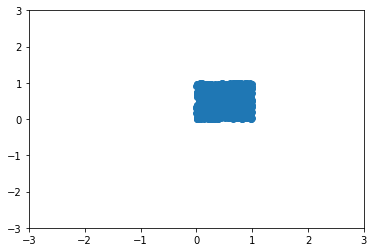

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#import torch

mu, sg = 3, 0.6
#x = 10 * np.random.normal(mu, sg, 1000)
x = np.random.rand(30, 30)

fig, ax = plt.subplots()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.scatter(x[1:], x[:-1])



## 0 center
+ minus mean

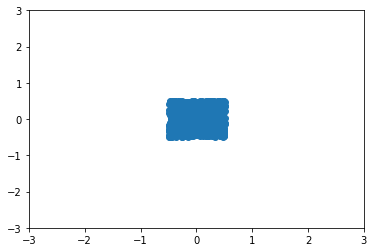

In [11]:
x -= x.mean()
#x -= np.mean(x, axis = 0)
fig, ax = plt.subplots()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.scatter(x[1:], x[:-1])

## Normalization
+ divide by std

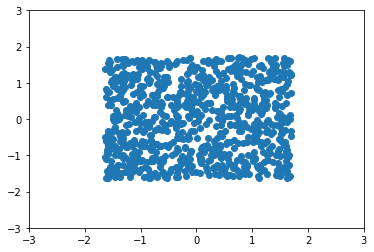

In [12]:
x /= x.std()
#x /= np.std(x, axis = 0)
fig, ax = plt.subplots()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.scatter(x[1:], x[:-1])

## Principal Component Analysis (PCA)
+ project on eigen vectors

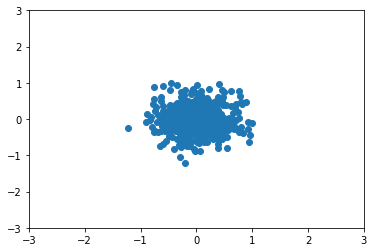

In [7]:
# Assume input data matrix X of size [N x D]
#import torch

x -= np.mean(x, axis = 0) # zero-center the data (important)
cov = np.dot(x.T, x) / x.shape[0] # get the data covariance matrix
U,S,V = np.linalg.svd(cov)
Xrot = np.dot(x, U) # decorrelate the data
Xrot_reduced = np.dot(x, U[:,:100]) # Xrot_reduced becomes [N x 100]

#print(Xrot_reduced.shape)
fig, ax = plt.subplots()
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.scatter(Xrot_reduced[1:], Xrot_reduced[:-1])

# Whitening
+ divided by eigenvalues

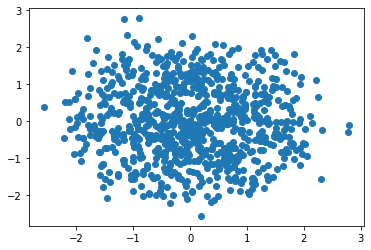

In [6]:
# whiten the data:
# divide by the eigenvalues (which are square roots of the singular values)
Xwhite = Xrot / np.sqrt(S + 1e-5)
fig, ax = plt.subplots()
#ax.set_xlim([-1, 1])
#ax.set_ylim([-1, 1])
ax.scatter(Xwhite[1:], Xwhite[:-1])

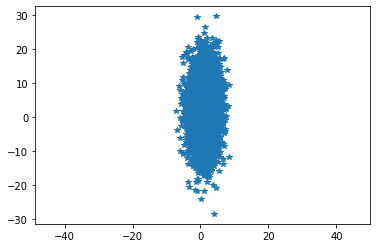

In [46]:
mean = [1, 2]
cov = [[5, 0], [0, 50]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, '*')
plt.axis('equal')
plt.show()